In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,description,category
0,0,Need Ethernet access,ACCESS
1,1,Create new account and share the username and ...,ACCESS
2,2,FW: Myspace Login Issue-- Ania,ACCESS
3,3,Login credetials are not working.,ACCESS
4,4,New Account is needed for a new joinee.,ACCESS


In [4]:
df.drop(labels = ['Unnamed: 0'], axis = 1, inplace = True)

In [5]:
df.head(10)

,description,category
0,Need Ethernet access,ACCESS
1,Create new account and share the username and ...,ACCESS
2,FW: Myspace Login Issue-- Ania,ACCESS
3,Login credetials are not working.,ACCESS
4,New Account is needed for a new joinee.,ACCESS
5,Request to configure the system to share it am...,ACCESS
6,Needs permission wifi access to laptop,ACCESS
7,LAN not working in a VM,HARDWARE
8,Wifi access needed.,ACCESS
9,My Space QA application is down,SOFTWARE


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
description    59 non-null object
category       59 non-null object
dtypes: object(2)
memory usage: 1.0+ KB


<Figure size 1728x1152 with 0 Axes>

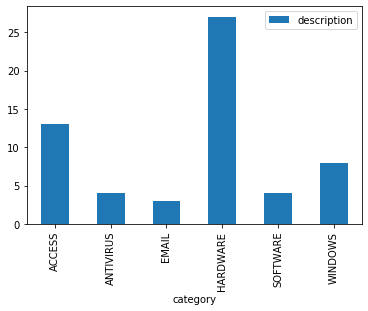

In [7]:
fig = plt.figure(figsize=(24,16))
df.groupby('category').count().plot.bar(ylim=0)
plt.show()

In [8]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import re
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
def lemmatizeWords(text):
    wn = WordNetLemmatizer()
    #sentence = sent_tokenize(text)
    words=word_tokenize(text)
    listLemma = []
    for w in words:
        x=wn.lemmatize(w,'v')
        listLemma.append(x)
    return text

In [11]:
def stopWordsRemove(text):
    stopWordList = set(stopwords.words('english'))
    wordList=[x.lower().strip() for x in word_tokenize(text)]
    removedList=[x for x in wordList if not x in stopWordList]
    text=' '.join(removedList)
    return text

In [12]:
def PreProcessing(text):
    text=lemmatizeWords(text)
    text=stopWordsRemove(text)
    return(text)

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\n", "", text)    
    text = re.sub(r"\r", "", text) 
    #text = re.sub(r"[0-9]", "digit", text)   
    text = re.sub(r"what’s", "what is ", text)
    text = re.sub(r"\’s", " ", text)
    text = re.sub(r"\’ve", " have ", text)
    text = re.sub(r"can’t", "cannot ", text)
    text = re.sub(r"n’t", " not ", text)
    text = re.sub(r"i’m", "i am ", text)
    text = re.sub(r"\’re", " are ", text)
    text = re.sub(r"\’d", " would ", text)
    text = re.sub(r"\’ll", " will ", text)
    text = re.sub(r"\’scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [14]:
df.Title = df.description.map(lambda x : clean_text(x))
df.Title = df.description.map(lambda x : PreProcessing(x))

C:\Users\nayak\Anaconda3\envs\Test1\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [15]:
df.Title[0]

'need ethernet access'

In [16]:
processed_df = df.to_csv('processed.csv',index = False)

In [17]:
df['category_id'] = df.category.factorize()[0]

In [18]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [19]:
category_id_df

,category,category_id
0,ACCESS,0
7,HARDWARE,1
9,SOFTWARE,2
12,WINDOWS,3
27,EMAIL,4
28,ANTIVIRUS,5


In [20]:
category_to_id

{'ACCESS': 0,
 'HARDWARE': 1,
 'SOFTWARE': 2,
 'WINDOWS': 3,
 'EMAIL': 4,
 'ANTIVIRUS': 5}

In [21]:
id_to_category

{0: 'ACCESS',
 1: 'HARDWARE',
 2: 'SOFTWARE',
 3: 'WINDOWS',
 4: 'EMAIL',
 5: 'ANTIVIRUS'}

In [22]:
df.head()

,description,category,category_id
0,Need Ethernet access,ACCESS,0
1,Create new account and share the username and ...,ACCESS,0
2,FW: Myspace Login Issue-- Ania,ACCESS,0
3,Login credetials are not working.,ACCESS,0
4,New Account is needed for a new joinee.,ACCESS,0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

In [24]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.description, df.category_id, test_size=0.3, random_state=5)

In [25]:
tfidf_vect = TfidfVectorizer(ngram_range=(1,2),max_df=0.5,min_df=2)

In [26]:
tfidf_vect.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=2, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [27]:
train_vectors = tfidf_vect.transform(X_train)

In [28]:
test_vectors = tfidf_vect.transform(X_test)

In [29]:
oneVsRestSVC = OneVsRestClassifier(LinearSVC(class_weight='balanced'))

In [30]:
oneVsRestSVC.fit(train_vectors,y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight='balanced',
                                        dual=True, fit_intercept=True,
                                        intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [31]:
pred = oneVsRestSVC.predict(test_vectors)

In [32]:
pred.shape

(18,)

In [33]:
print(pred)

[1 1 1 1 1 1 1 1 0 5 1 1 1 3 0 3 1 3]


In [ ]:
#print(classification_report(y_test,pred,target_names=category_to_id))

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [35]:
import pickle

In [36]:
#Saving the SVC model
filename = 'finalized_model.sav'
pickle.dump(oneVsRestSVC, open(filename, 'wb'))

In [37]:
tfidfmodel = 'tfidf_model.sav'
pickle.dump(tfidf_vect, open(tfidfmodel, 'wb'))

In [38]:
input_text = ["Need to install office"]

text_feats = tfidf_vect.transform(input_text)
prediction = oneVsRestSVC.predict(text_feats)[0]

category = ""
for key, value in id_to_category.items():
    if key == prediction:
        category = value
        print(category)

SOFTWARE
